In [1]:
# Machine Learning - Supervised Learning - Classification Algorithms
# Classification algorithms are used when dependent variable(y) is non
# numerical and either Binary or Multinomial(more than 2 levels/groups)

# Classification ALgorithms - Binary Logistic Regression explains the
# relationship between a binary(yes/no) dependent variable(y) and 
# multiple independent variables (X's).

# Binary Logistic Regression is an equation.
#       exp^B0+B1X1+B2X2+B3X3+...........+BnXn
#   p = --------------------------------------------- or p=1/(1+exp(-Z))
#       1+ exp^B0+B1X1+B2X2+B3X3+...........+BnXn      Z=B0+B1X1+...BnXn

# p - probability lies between 0 and 1. Classification predicted probability
# exp - exponential or 2.7138
# B0 - intercept or constant
# B1,B2,B3,...Bn -Coefficients
# X1,X2,X3,...Xn -Independent Variables

# Classification Rule for all classification algorithms (Binary)
# probability >=0.50 ---- 1(yes)
# probability <0.50  ---- 0(no)

# Assumptions
# 1) Logical linear relationship between dependent variable and independnet
# variables
# 2) No Multicollinearity
# 3) Sample Size required is minimum 50 observations per variable

# Interpretation of Output
# Primary metric is Accuracy which is calculated from Confusion Matrix
# Confusion Matrix is a 2 X 2 cross tabulation of Actual Class and 
# Predicted Class.

# Actual Positive and Predicted Positive - True Positive
# Actual Positive and Predicted Negative - False Negative (Type II Error)
# Actual Negative and Predicted Positive - False Positive (Type I Error)
# Actual Negative and predicted Negative - True Negative

# Type II Error means PAtient has Covid but RTPCR Test gave Negative result
# Type I Error means Pateint has no covid but RTPCR Test gave Positive 
# result.

# Python Output
# model.score(X,y) - Accuracy which is calculated from ConfusionMatrix
# intercept + Coefficients
# Other metrics using Classification_report - Sensitivity, F1 Score ,
# Precision, etc.

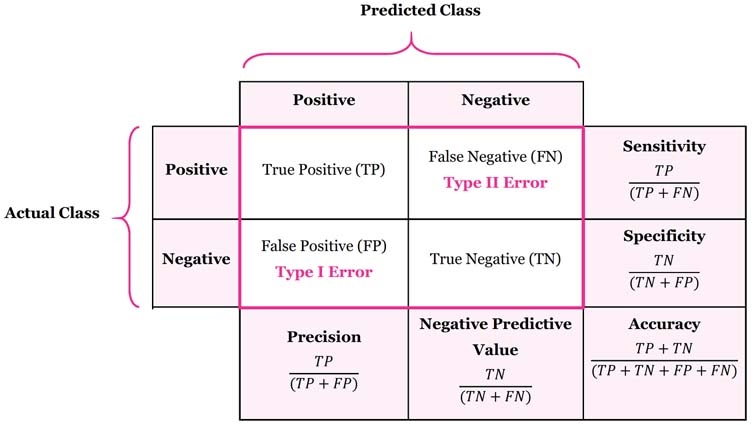

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Hackathon/HR Analytics'

/Users/rajeshprabhakarkaila/Desktop/Hackathon/HR Analytics


In [4]:
hrtrain=pd.read_csv("train_LZdllcl.csv")

In [5]:
hrtest=pd.read_csv("test_2umaH9m.csv")

In [6]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [8]:
# For preprocessing concat both dataframes
# Add dependent variable temporraily to test data
hrtest['is_promoted']='test'

In [9]:
# Concat both dataframes - Row wise Concatenation
combinedf=pd.concat([hrtrain,hrtest],axis=0)

In [10]:
combinedf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
objcols=combinedf[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 
                   'awards_won?','is_promoted']]

In [12]:
numcols=combinedf[['no_of_trainings', 'age','length_of_service',
                  'avg_training_score']]

In [13]:
for i in objcols.columns:
    freq=objcols[i].value_counts(dropna=False)
    print(freq)

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64
Bachelor's          52247
Master's & above    21429
N

In [14]:
# most_frequent imputation
for i in objcols.columns:
    objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
    
# idxmax() - index corresponding to maximum frequency or most_frequent

/var/folders/r3/dbt2z1y15j5_krgqpzp7j_pc0000gn/T/ipykernel_10702/1535428335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
/var/folders/r3/dbt2z1y15j5_krgqpzp7j_pc0000gn/T/ipykernel_10702/1535428335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
/var/folders/r3/dbt2z1y15j5_krgqpzp7j_pc0000gn/T/ipykernel_10702/1535428335.py:3: SettingWithCopyWarning: 
A value is trying t

In [15]:
objcols.previous_year_rating.value_counts().idxmax()

3.0

In [16]:
objcols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

In [17]:
objcols_dummy=pd.get_dummies(objcols,columns=['department', 'region', 
                                              'education', 'gender', 
                                              'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?'])
# Dummy Encoding only on Independent Variables (X's)
# LabelEncoder only on dependent variable (y) in classification only

In [18]:
# Concat both dataframes - Column Concatenation
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [19]:
hrtrain_df=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtest_df=combinedf_clean[combinedf_clean.is_promoted=='test']

In [20]:
hrtest_df=hrtest_df.drop('is_promoted',axis=1)

In [21]:
# To check excel output 
X=hrtrain_df[['no_of_trainings', 'age','length_of_service',
                  'avg_training_score']]
y=hrtrain_df.is_promoted

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
y=LabelEncoder().fit_transform(y)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logit=LogisticRegression()

In [26]:
logitmodel=logit.fit(X,y)

In [27]:
logitmodel.score(X,y) # Accuracy from Confusion Matrix

0.9148299518318493

In [28]:
logitmodel.intercept_

array([-5.06231887])

In [29]:
pd.DataFrame(logitmodel.coef_,columns=X.columns)

,no_of_trainings,age,length_of_service,avg_training_score
0,-0.244386,-0.005327,0.002718,0.047163


In [30]:
logitpredict=logitmodel.predict(X)

In [31]:
pd.crosstab(y,logitpredict) # Confusion Matrix

col_0,0
row_0,
0,50140
1,4668


In [32]:
50140/(50140+4668)

0.9148299518318493

In [33]:
X=hrtrain_df.drop('is_promoted',axis=1)

In [34]:
logit=LogisticRegression(max_iter=2000,random_state=42) # increased iterations to 2000
# Convergence Warning - All Coefficients in equation are not calculated
# increase iterations or scale independent variables is solution

In [35]:
logitmodel=logit.fit(X,y)

In [36]:
logitmodel.score(X,y) # Accuracy from confusion Matrix

0.9317617866004962

In [37]:
logitpredict=logitmodel.predict(X)

In [38]:
pd.crosstab(y,logitpredict)
# True Negative - 49833
# False Positive - 307
# False Negative - 3438
# True Positive - 1230

# is_promoted - 0 is No - Negative
# is_promoted - 1 is Yes  - Positive

col_0,0,1
row_0,,
0,49832,308
1,3432,1236


In [39]:
(49833+1230)/(49833+307+3438+1230)

0.9316705590424755

In [40]:
# Sensitivity/recall = TP/(TP+FN)
1230/(1230+3438)

0.2634961439588689

In [41]:
# Specificity = TN/(TN+FP)
49833/(49833+307)

0.9938771439968089

In [42]:
# Precision= TP/(TP+FP)
1230/(1230+307)

0.8002602472348731

In [43]:
# F1 Score = 2 X ((Precision*Recall)/(Precision+Recall))
2*((0.800*0.263)/(0.800+0.263))

0.39586077140169335

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y,logitpredict))

# Imbalance Data or Imbalance in Dependent Variable Classes 
# 0- 50140 (Majority Class)
# 1- 4668 (Minority Class)

# Minority Class prediction is worst.

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree=DecisionTreeClassifier(max_depth=12)

In [48]:
treemodel=tree.fit(X,y)

In [49]:
treemodel.score(X,y)

0.9448803094438768

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cross_val_score(tree,X,y)

array([0.93742018, 0.93504835, 0.93869732, 0.94106377, 0.93577228])

In [52]:
tree_test_pred=treemodel.predict(hrtest_df)

In [53]:
pd.DataFrame(tree_test_pred).to_csv("tree.csv")

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RF=RandomForestClassifier(n_estimators=5000)

In [56]:
RFmodel=RF.fit(X,y)

In [57]:
RFmodel.score(X,y)

0.999744562837542

In [58]:
RF_test_pred=RFmodel.predict(hrtest_df)

In [59]:
pd.DataFrame(RF_test_pred).to_csv("RF.csv")

In [60]:
# Random (Sampling) Forest (Multiple Trees) - Random Forest is an Iterative Algorithm
# Bagging means Bootstrap Aggregating which is the sampling method used. Also called as
# Data with replacement.

# Overcomes the overfitting problem in Decision Tree.

# Step 1 - Specify the number of trees to be built n_estimators =1000 (1000 Decision Trees)
# Step 2 - Create 1000 Samples of data from original data and each sample will have 65% of 
# randomly selected Rows or Observations and Sqrt(num of vaiables) randomly selected. If data 
# is large Enough RAM memory will not be there.
# Step 3 - Upon creating 1000 samples of data decision trees are parallely built as each sample
# is independent.  1 Decision Tree per Sample.
# Step 4 - Prediction will also be done for each tree.
# Step 5 - All predictions are aggregated and
# Classification - Majority Voting
# Regression - Averaging

# Tree splitting Methods 
# 1) Gini (default) - 1-Σ(prob)^2
# 2) Entropy & Information Gain
# 3) Standard Deviation Reduction (Regression)

# Feature/Variable Importance is provided as part of output

# Non parametric Algorithm an works both as Regression and Classification

# GridSearch is the best method for hyper parameter tuning for Random Forest

# Only disadvantage is Computing Power

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbm=GradientBoostingClassifier(n_estimators=2000)

In [63]:
gbmmodel=gbm.fit(X,y)

In [64]:
gbmmodel.score(X,y)

0.9483469566486644

In [65]:
gbm_test_pred=gbmmodel.predict(hrtest_df)

In [66]:
pd.DataFrame(gbm_test_pred).to_csv("gbm.csv")

In [71]:
from sklearn.naive_bayes import CategoricalNB

In [72]:
nb=CategoricalNB()

In [73]:
nbmodel=nb.fit(X,y)

In [74]:
nbmodel.score(X,y)

0.8835753904539483

In [75]:
nb_test_predict=nbmodel.predict(hrtest_df)

In [76]:
pd.DataFrame(nb_test_predict).to_csv("nb.csv")